## 
# PROSPECTIVE DONORS PREDICTION

You have been hired to deliver actionable insight to support your client who is a national charitable 
organization. The client seeks to use the results of a previous postcard mail solicitation for donations to 
improve outcome in the next campaign. You want to determine which of the individuals in their mailing 
database have characteristics similar to those of your most profitable donors. By soliciting only these 
people, your client can spend less money on the solicitation effort and more money on charitable
concerns. 

You have been provided two data sets:
A. Donor Raw Data: this is a historical data, containing previous donor details. Target B column, 
provides information whether they have donated in past campaign or not.
B. Prospective Donors: this is a list of new contact; your client is interested in reaching out to in 
the next campaign they intend to carry out soon.
You are required to deliver a ten-page PowerPoint presentation of your actionable recommendation 
to help the client identify which prospects they should focus their next campaign on.


The aim of the project is to develop a predictive model that is able to predict the potential<br>donor and also to
reduce expenses on the solicitation effort.

A careful examination of the dataset led to the following models being selected for training:
    
     <li> LogisticRegressionl</li>
     <li> DecisionTreeClassifier</li>
     <li> KNeighborsClassifier</li>
     <li> MultinomialNB</li>
     <li> SVC</li>

*** ***

### Data collection and methodology
* Data Collection From working directory

  First to carry out the analysis, all the necessary and relevant libraries were imported on the jupiter Notebook.
  these libraries includes:
  * numpy
  * pandas
  * seaborn
  * matplotlib
  * warnings

## Evaluation Metric

donor_dataset.csv dataset will be used for prediction and model perfomance will be evaluated on the basic of predicted values, the following evalution technique are consider for the model evalution:
    
    Root Mean Square Error
    R squared value
    Mean Absolute Error
    Accuracy Score               


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


** **

### DATA EXTRACTION FROM WORKING DIRECTORY

  We are obtaining the dataset from working directory

In [2]:
donor_dataset = pd.read_csv("Donor Raw Data_ML with Python.csv")
donor_dataset.head(5)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [3]:
prospective_donor_dataset = pd.read_csv("Prospective Donor_ML with Python.csv")
prospective_donor_dataset

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,C,1,24,U,F,2.0,...,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,01,U,M,4.0,...,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,?,.,U,F,6.0,...,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,?,.,U,F,3.0,...,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


### 
### Descriptive analysis For Donor  Dataset

Here we need to describe and get better understanding about our dataset

In [4]:
donor_dataset.shape

(19372, 50)

In [5]:
donor_dataset.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [6]:
donor_dataset.isnull().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [7]:
donor_dataset.duplicated().sum()

0

In [8]:
# To determine number of the dataset rows
len(donor_dataset)

19372

In [9]:
# To determinine the percentage of missing TARGET_D
(donor_dataset['TARGET_D'].isnull().sum()/len(donor_dataset))*100

75.0

In [10]:
# To determine the percemtage of present data in TARGET_D
(donor_dataset['TARGET_D'].value_counts().sum()/len(donor_dataset))*100

25.0

In [11]:
# To determinine the percentage of missing DONOR_AGE
(donor_dataset['DONOR_AGE'].isnull().sum()/len(donor_dataset))*100

24.752219698533967

In [12]:
# To determine the percemtage of present data in DONOR_AGE
(donor_dataset['DONOR_AGE'].value_counts().sum()/len(donor_dataset))*100

75.24778030146604

In [13]:
donor_dataset['DONOR_AGE'].mode()

0    67.0
Name: DONOR_AGE, dtype: float64

In [14]:
donor_dataset['DONOR_AGE'].mean()

58.91905055909995

In [15]:
donor_dataset['DONOR_AGE'].median()

60.0

<Axes: >

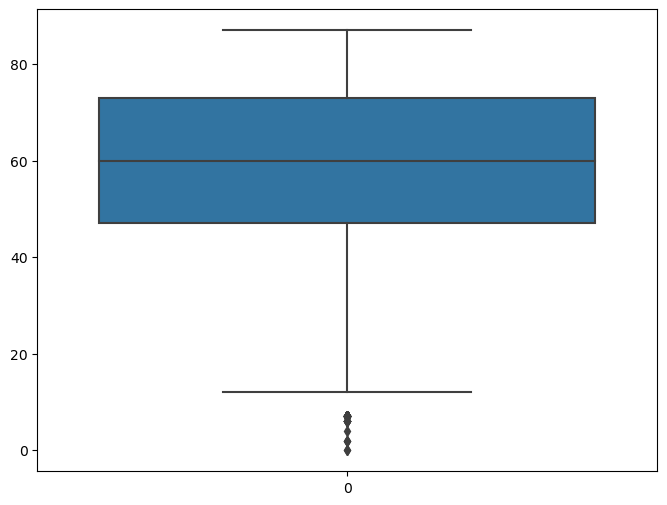

In [16]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(donor_dataset['DONOR_AGE'])

<Axes: xlabel='DONOR_AGE', ylabel='Density'>

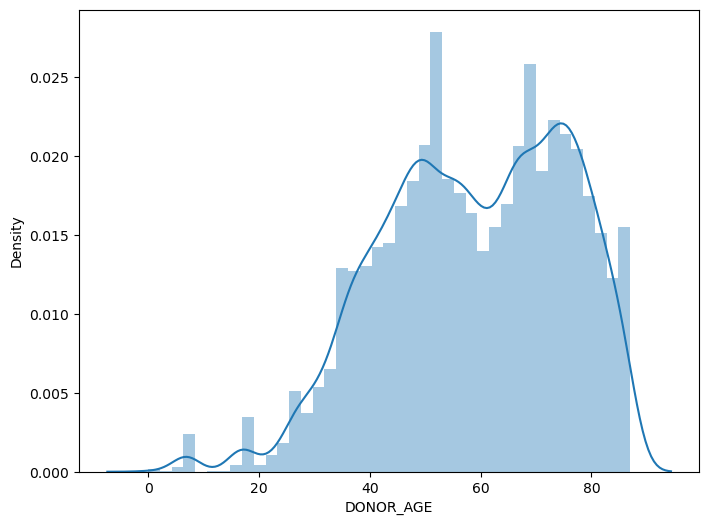

In [17]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(donor_dataset['DONOR_AGE'])

In [18]:
# To determinine the percentage of missing INCOME_GROUP
(donor_dataset['INCOME_GROUP'].isnull().sum()/len(donor_dataset))*100

22.671897584142062

In [19]:
# To determine the percemtage of present data in INCOME_GROUP
(donor_dataset['INCOME_GROUP'].value_counts().sum()/len(donor_dataset))*100

77.32810241585794

In [20]:
donor_dataset['INCOME_GROUP'].mode()

0    5.0
Name: INCOME_GROUP, dtype: float64

In [21]:
donor_dataset['INCOME_GROUP'].median()

4.0

In [22]:
donor_dataset['INCOME_GROUP'].mean()

3.907543391188251

<Axes: >

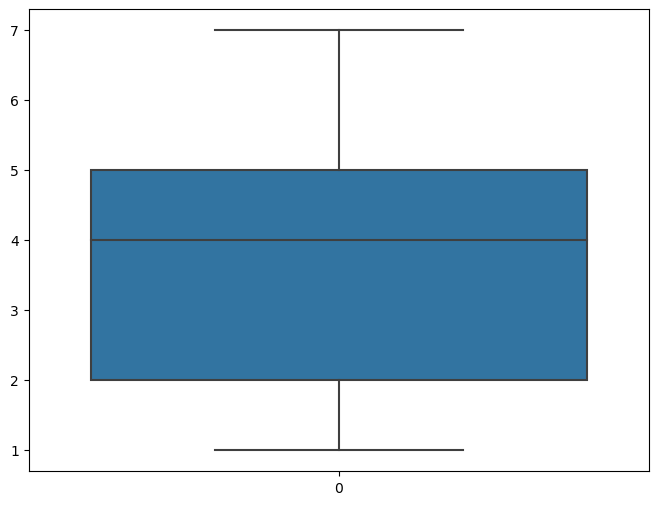

In [23]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(donor_dataset['INCOME_GROUP'])

<Axes: xlabel='INCOME_GROUP', ylabel='Density'>

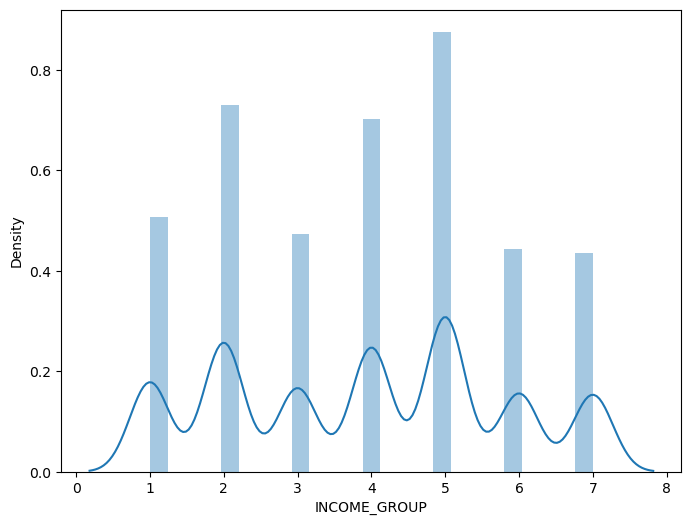

In [24]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(donor_dataset['INCOME_GROUP'])

In [25]:
# To determinine the percentage of missing MONTHS_SINCE_LAST_PROM_RESP
(donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].isnull().sum()/len(donor_dataset))*100

1.2698740450134214

In [26]:
# To determine the percemtage of present data in MONTHS_SINCE_LAST_PROM_RESP
(donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].value_counts().sum()/len(donor_dataset))*100

98.73012595498658

In [27]:
donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].mode()

0    18.0
Name: MONTHS_SINCE_LAST_PROM_RESP, dtype: float64

In [28]:
donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].median()

18.0

In [29]:
donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].mean()

19.038899926801214

<Axes: >

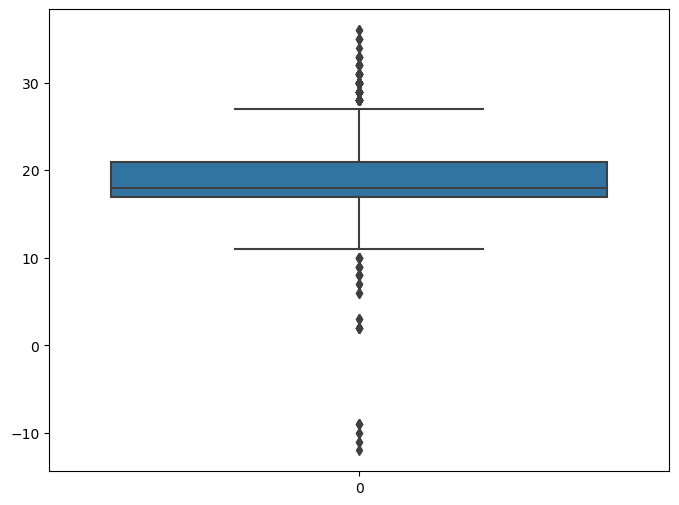

In [30]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'])

<Axes: xlabel='MONTHS_SINCE_LAST_PROM_RESP', ylabel='Density'>

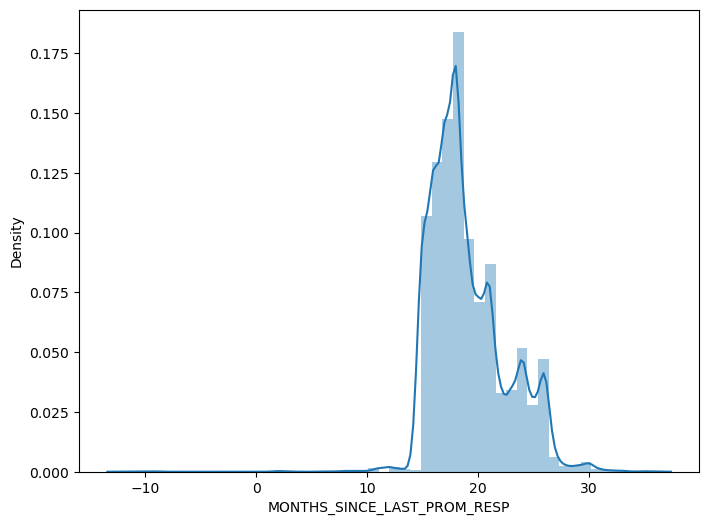

In [31]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'])

In [32]:
# To determinine the percentage of missing WEALTH_RATING
(donor_dataset['WEALTH_RATING'].isnull().sum()/len(donor_dataset))*100

45.47800949824489

In [33]:
# To determine the percemtage of present data in WEALTH_RATING
(donor_dataset['WEALTH_RATING'].value_counts().sum()/len(donor_dataset))*100

54.52199050175511

In [34]:
donor_dataset['WEALTH_RATING'].mode()

0    9.0
Name: WEALTH_RATING, dtype: float64

In [35]:
donor_dataset['WEALTH_RATING'].median()

5.0

In [36]:
donor_dataset['WEALTH_RATING'].mean()

5.005396705169476

<Axes: >

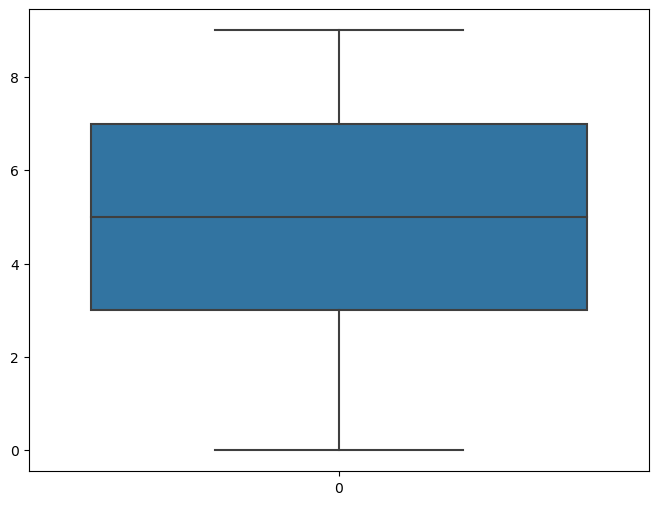

In [37]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(donor_dataset['WEALTH_RATING'])

<Axes: xlabel='WEALTH_RATING', ylabel='Density'>

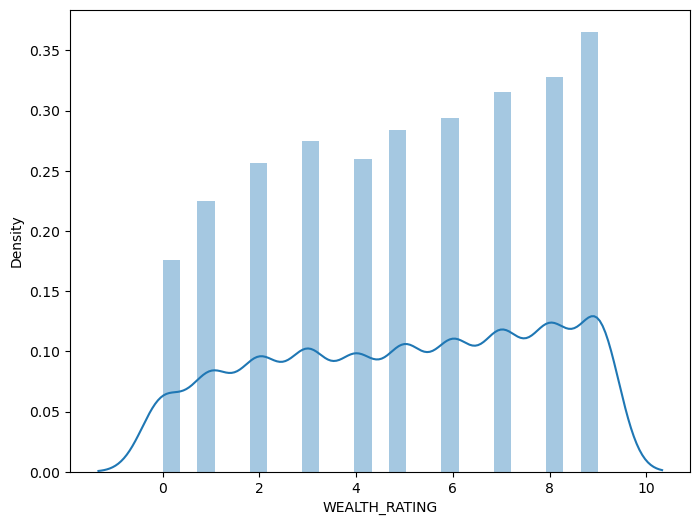

In [38]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(donor_dataset['WEALTH_RATING'])

## Deciding imputation technique
Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.<br>
Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean..<br>
Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

## 
## Understanding unique value in dataset

In [39]:
donor_dataset['RECENCY_STATUS_96NK'].unique()

array(['A', 'S', 'F', 'E', 'N', 'L'], dtype=object)

In [40]:
donor_dataset['OVERLAY_SOURCE'].unique()

array(['P', 'B', 'N', 'M'], dtype=object)

In [41]:
donor_dataset['DONOR_GENDER'].unique()

array(['M', 'F', 'U', 'A'], dtype=object)

In [42]:
donor_dataset['HOME_OWNER'].unique()

array(['H', 'U'], dtype=object)

In [43]:
donor_dataset['CLUSTER_CODE'].unique()

array([' .', '45', '11', '04', '49', '08', '50', '28', '30', '43', '53',
       '42', '46', '20', '16', '40', '07', '34', '23', '35', '41', '25',
       '10', '01', '09', '02', '12', '14', '37', '36', '15', '39', '38',
       '18', '48', '24', '03', '13', '31', '05', '27', '19', '51', '22',
       '17', '26', '21', '44', '06', '29', '33', '47', '32', '52'],
      dtype=object)

In [44]:
donor_dataset['SES'].unique()

array(['?', '2', '1', '3', '4'], dtype=object)

In [45]:
donor_dataset['URBANICITY'].unique()

array(['?', 'R', 'S', 'U', 'C', 'T'], dtype=object)

In [46]:
# get the unique()
donor_dataset.nunique()

TARGET_B                           2
TARGET_D                          70
CONTROL_NUMBER                 19372
MONTHS_SINCE_ORIGIN               28
DONOR_AGE                         80
IN_HOUSE                           2
URBANICITY                         6
SES                                5
CLUSTER_CODE                      54
HOME_OWNER                         2
DONOR_GENDER                       4
INCOME_GROUP                       7
PUBLISHED_PHONE                    2
OVERLAY_SOURCE                     4
MOR_HIT_RATE                      65
WEALTH_RATING                     10
MEDIAN_HOME_VALUE               3130
MEDIAN_HOUSEHOLD_INCOME          924
PCT_OWNER_OCCUPIED               100
PER_CAPITA_INCOME              11418
PCT_ATTRIBUTE1                    72
PCT_ATTRIBUTE2                    83
PCT_ATTRIBUTE3                    89
PCT_ATTRIBUTE4                   100
PEP_STAR                           2
RECENT_STAR_STATUS                23
RECENCY_STATUS_96NK                6
F

****

### CLEAN UP THE DATASET DONOR DATASET

#### Drop the column "TARGET_D" because it contain 75% missing data

In [47]:
donor_dataset.drop(['TARGET_D'], axis=1, inplace=True)

#### Fill the missing number Item_Weight column with mean

In [48]:
donor_age_median = donor_dataset['DONOR_AGE'].median()
donor_dataset['DONOR_AGE'].fillna(donor_age_median, inplace=True)

In [49]:
donor_wealth_median = donor_dataset['WEALTH_RATING'].median()
donor_dataset['WEALTH_RATING'].fillna(donor_wealth_median, inplace=True)

In [50]:
donor_incomegrp_mean = donor_dataset['INCOME_GROUP'].mean()
donor_dataset['INCOME_GROUP'].fillna(donor_incomegrp_mean, inplace=True)

In [51]:
donor_month_median = donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].median()
donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].fillna(donor_month_median, inplace=True)

In [52]:
donor_dataset['CLUSTER_CODE'].mode()

0    40
Name: CLUSTER_CODE, dtype: object

In [53]:
donor_dataset['CLUSTER_CODE'].replace(' .', '40', inplace = True)

In [54]:
donor_dataset['SES'].mode()

0    2
Name: SES, dtype: object

In [55]:
donor_dataset['SES'].replace('?', '2', inplace=True)

In [56]:
donor_dataset['URBANICITY'].mode()

0    S
Name: URBANICITY, dtype: object

In [57]:
donor_dataset['URBANICITY'].replace('?', 'S', inplace = True)

## Check again for missing number

In [58]:
donor_dataset.isnull().sum()

TARGET_B                       0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG

In [59]:
donor_dataset

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,S,2,40,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,U,2,04,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,191687,89,66.0,1,U,1,03,H,F,...,22.0,25.0,3.0,15.0,6,13,18,81,17.17,3
19368,0,191710,137,77.0,1,C,1,24,H,F,...,9.0,10.0,1.0,10.0,6,13,21,130,7.81,13
19369,0,191746,29,60.0,1,S,1,11,U,M,...,0.0,15.0,15.0,15.0,3,9,23,23,15.00,0
19370,0,191775,129,78.0,1,S,2,40,U,M,...,20.0,25.0,5.0,25.0,7,24,8,129,18.33,11


## Check information about the dataset

In [60]:
donor_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   CONTROL_NUMBER               19372 non-null  int64  
 2   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 3   DONOR_AGE                    19372 non-null  float64
 4   IN_HOUSE                     19372 non-null  int64  
 5   URBANICITY                   19372 non-null  object 
 6   SES                          19372 non-null  object 
 7   CLUSTER_CODE                 19372 non-null  object 
 8   HOME_OWNER                   19372 non-null  object 
 9   DONOR_GENDER                 19372 non-null  object 
 10  INCOME_GROUP                 19372 non-null  float64
 11  PUBLISHED_PHONE              19372 non-null  int64  
 12  OVERLAY_SOURCE               19372 non-null  object 
 13  MOR_HIT_RATE    

****

### CONVET RELEVANT DATA TO NUMERIC REPRESENTATION

In [61]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder()
donor_dataset['URBANICITY'] = ord_enc.fit_transform(donor_dataset[['URBANICITY']])
donor_dataset['HOME_OWNER'] =ord_enc.fit_transform(donor_dataset[['HOME_OWNER']])
donor_dataset['DONOR_GENDER'] =ord_enc.fit_transform(donor_dataset[['DONOR_GENDER']])

donor_dataset.head()

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,5,101,87.0,0,2.0,2,40,0.0,2.0,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,1.0,2,45,0.0,2.0,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,2.0,1,11,0.0,1.0,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,4.0,2,04,0.0,1.0,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,1.0,2,49,1.0,1.0,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


## Correlation Graph

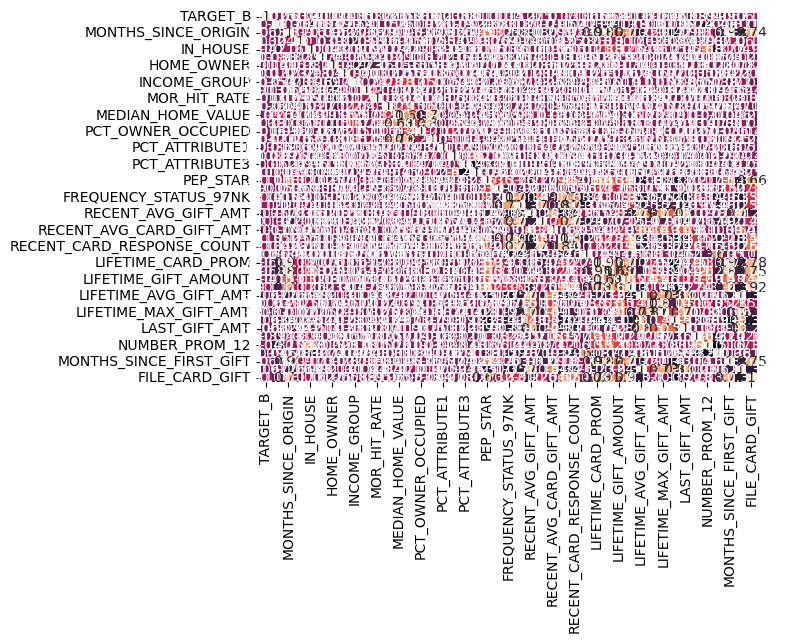

In [62]:
corr = donor_dataset.corr()
sns.heatmap(corr,annot=True,cbar=False)
cor_trans = corr.transpose()

In [63]:
cor_trans

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
TARGET_B,1.000000,0.024607,0.062795,0.031826,0.040964,0.001749,-0.013532,0.001301,0.035099,-0.003219,...,-0.006354,-0.036990,-0.062756,-0.068220,0.038947,0.039967,-0.089854,0.066514,-0.067107,0.105552
CONTROL_NUMBER,0.024607,1.000000,-0.077874,-0.004554,-0.213938,0.083122,0.049110,0.022237,0.054416,-0.110440,...,-0.030587,-0.011010,0.035819,0.000237,-0.143549,-0.316467,0.046103,-0.086687,0.011250,-0.083132
MONTHS_SINCE_ORIGIN,0.062795,-0.077874,1.000000,0.200131,0.155967,-0.032202,-0.006714,0.022931,-0.072750,0.065620,...,0.205255,-0.016958,-0.424114,-0.099209,0.130670,0.149149,-0.027650,0.987825,-0.260474,0.743423
DONOR_AGE,0.031826,-0.004554,0.200131,1.000000,0.103436,-0.038933,0.030426,0.020279,-0.176921,0.058338,...,0.025029,-0.019759,-0.087504,-0.041834,0.039377,0.079585,-0.070724,0.199601,-0.062660,0.165123
IN_HOUSE,0.040964,-0.213938,0.155967,0.103436,1.000000,-0.004272,0.031991,0.017979,-0.026441,0.009204,...,0.157196,0.120986,-0.053809,0.050214,0.207320,0.575198,-0.321198,0.167424,0.049300,0.156637
URBANICITY,0.001749,0.083122,-0.032202,-0.038933,-0.004272,1.000000,-0.010210,-0.000070,0.068927,-0.033509,...,-0.007352,0.005154,0.024388,0.014218,-0.000895,-0.014525,0.007448,-0.031426,0.019555,-0.027380
HOME_OWNER,-0.013532,0.049110,-0.006714,0.030426,0.031991,-0.010210,1.000000,0.042349,-0.265674,-0.225903,...,0.010293,0.003937,-0.011585,-0.013140,-0.031112,-0.002341,-0.021103,-0.007810,-0.010513,0.024554
DONOR_GENDER,0.001301,0.022237,0.022931,0.020279,0.017979,-0.000070,0.042349,1.000000,0.039820,-0.003002,...,0.006722,0.016782,0.021182,0.023416,-0.005493,0.008306,-0.004724,0.021685,0.030755,0.005848
INCOME_GROUP,0.035099,0.054416,-0.072750,-0.176921,-0.026441,0.068927,-0.265674,0.039820,1.000000,-0.023924,...,0.017397,0.057108,0.082479,0.084956,-0.005705,-0.017849,0.038263,-0.071966,0.099670,-0.085532
PUBLISHED_PHONE,-0.003219,-0.110440,0.065620,0.058338,0.009204,-0.033509,-0.225903,-0.003002,-0.023924,1.000000,...,-0.011141,-0.032066,-0.043706,-0.027578,-0.003663,-0.000997,0.004298,0.065033,-0.044379,0.039286


In [64]:
cor_trans.sort_values(by=['TARGET_B'])

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
MONTHS_SINCE_LAST_GIFT,-0.089854,0.046103,-0.027650,-0.070724,-0.321198,0.007448,-0.021103,-0.004724,0.038263,0.004298,...,-0.051627,0.000661,0.099384,0.090277,-0.318031,-0.512797,1.000000,-0.033261,0.061294,-0.112385
RECENT_AVG_GIFT_AMT,-0.074668,0.016568,-0.079780,-0.034787,0.060396,0.019825,-0.008538,0.027679,0.082746,-0.034165,...,0.506424,0.711141,0.476724,0.801052,0.019645,0.077814,0.071339,-0.080538,0.791292,-0.221272
LAST_GIFT_AMT,-0.068220,0.000237,-0.099209,-0.041834,0.050214,0.014218,-0.013140,0.023416,0.084956,-0.027578,...,0.498819,0.730430,0.530185,1.000000,0.018247,0.073464,0.090277,-0.100742,0.803911,-0.222736
LIFETIME_AVG_GIFT_AMT,-0.067107,0.011250,-0.260474,-0.062660,0.049300,0.019555,-0.010513,0.030755,0.099670,-0.044379,...,0.354731,0.730844,0.804668,0.803911,-0.025723,0.073462,0.061294,-0.264758,1.000000,-0.321794
FILE_AVG_GIFT,-0.067107,0.011250,-0.260474,-0.062660,0.049300,0.019555,-0.010513,0.030755,0.099670,-0.044379,...,0.354731,0.730844,0.804668,0.803911,-0.025723,0.073462,0.061294,-0.264758,1.000000,-0.321794
MONTHS_SINCE_LAST_PROM_RESP,-0.065562,-0.003930,0.049287,-0.022816,0.009954,0.001786,0.002799,0.002508,0.027739,0.000673,...,0.083174,0.101072,0.046489,0.121450,-0.134583,-0.149580,0.659575,0.049924,0.107114,-0.053922
LIFETIME_MIN_GIFT_AMT,-0.062756,0.035819,-0.424114,-0.087504,-0.053809,0.024388,-0.011585,0.021182,0.082479,-0.043706,...,-0.135598,0.367053,1.000000,0.530185,-0.160415,-0.088699,0.099384,-0.433616,0.804668,-0.393441
LIFETIME_MAX_GIFT_AMT,-0.036990,-0.011010,-0.016958,-0.019759,0.120986,0.005154,0.003937,0.016782,0.057108,-0.032066,...,0.871837,1.000000,0.367053,0.730430,0.072746,0.175822,0.000661,-0.015954,0.730844,-0.100271
RECENT_AVG_CARD_GIFT_AMT,-0.016935,0.011152,-0.098712,-0.022378,0.055837,0.013047,-0.007337,0.010516,0.057799,-0.023160,...,0.361189,0.492832,0.310950,0.488752,0.081097,0.100547,0.003854,-0.097280,0.537345,-0.041449
HOME_OWNER,-0.013532,0.049110,-0.006714,0.030426,0.031991,-0.010210,1.000000,0.042349,-0.265674,-0.225903,...,0.010293,0.003937,-0.011585,-0.013140,-0.031112,-0.002341,-0.021103,-0.007810,-0.010513,0.024554


## Feature Selection Methods

In [65]:
corr = donor_dataset.corr()
corr_target = abs(corr["TARGET_B"])
relevant_features = corr_target[corr_target > 0.1]
relevant_features.index

Index(['TARGET_B', 'PEP_STAR', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'LIFETIME_GIFT_COUNT', 'FILE_CARD_GIFT'],
      dtype='object')

****

### DROP UNRELEVANT COLUMNS AND SELECT FEATURE

In [66]:
target = donor_dataset['TARGET_B']
feature = donor_dataset.drop(columns=['TARGET_B','SES','CLUSTER_CODE','OVERLAY_SOURCE','RECENCY_STATUS_96NK'])

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [68]:
uni = SelectKBest(score_func = f_classif, k =15)
fit = uni.fit(feature, target)

In [69]:
feature.columns[fit.get_support(indices=True)].tolist()

['PEP_STAR',
 'FREQUENCY_STATUS_97NK',
 'RECENT_RESPONSE_PROP',
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'LIFETIME_PROM',
 'LIFETIME_GIFT_COUNT',
 'LIFETIME_AVG_GIFT_AMT',
 'LAST_GIFT_AMT',
 'MONTHS_SINCE_LAST_GIFT',
 'MONTHS_SINCE_FIRST_GIFT',
 'FILE_AVG_GIFT',
 'FILE_CARD_GIFT']

In [70]:
# Selected features
feature = feature[feature.columns[fit.get_support(indices=True)].tolist()]
feature

,PEP_STAR,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,LIFETIME_PROM,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,1,1,0.067,15.00,0.000,1,0,45,35,8.49,15.0,26,92,8.49,7
1,1,2,0.235,15.00,0.250,4,2,90,25,14.72,17.0,7,122,14.72,12
2,1,3,0.409,21.67,0.545,9,6,119,36,16.75,19.0,6,105,16.75,16
3,1,3,0.474,13.44,0.400,9,4,96,37,11.76,15.0,6,92,11.76,12
4,0,1,0.100,17.50,0.111,2,1,83,12,8.83,25.0,18,92,8.83,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,0,2,0.154,15.00,0.167,2,1,50,6,17.17,15.0,18,81,17.17,3
19368,1,3,0.200,9.00,0.200,4,2,76,21,7.81,10.0,21,130,7.81,13
19369,0,1,0.000,0.00,0.000,0,0,14,1,15.00,15.0,23,23,15.00,0
19370,1,1,0.053,25.00,0.000,1,0,99,24,18.33,25.0,8,129,18.33,11


In [71]:
target

0        0
1        1
2        0
3        0
4        0
        ..
19367    0
19368    0
19369    0
19370    0
19371    1
Name: TARGET_B, Length: 19372, dtype: int64

****

### CLEAN UP THE DATASET PROSPECTIVE DONOR DATASET

prospective_donor_dataset

In [72]:
prospective_donor_dataset.shape

(2148, 48)

In [73]:
prospective_donor_dataset

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,C,1,24,U,F,2.0,...,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,191056,41,17.0,1,U,1,01,U,M,4.0,...,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,191164,89,55.0,0,?,?,.,U,F,6.0,...,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,191484,65,42.0,1,?,?,.,U,F,3.0,...,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


In [74]:
prospective_donor_dataset.describe()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,2148.000000,2148.000000,1619.000000,2148.000000,1667.000000,2148.000000,2148.000000,1142.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,96146.865456,73.631285,58.185917,0.067970,3.902819,0.493017,3.357076,4.974606,1028.019088,339.798417,...,10.972472,18.595196,7.622723,16.309828,5.331471,12.702514,18.378492,69.681564,12.649097,5.248603
std,54518.044553,41.969403,16.765323,0.251753,1.840627,0.500068,8.585609,2.809815,895.363300,149.754159,...,10.053029,10.874603,7.135016,10.367477,1.251732,4.441983,3.960876,38.325088,7.386101,4.717410
min,139.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,4.000000,15.000000,1.360000,0.000000
25%,51402.000000,29.000000,46.000000,0.000000,2.000000,0.000000,0.000000,3.000000,508.750000,239.000000,...,5.000000,13.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.130000,2.000000
50%,96092.000000,65.000000,59.000000,0.000000,4.000000,0.000000,0.000000,5.000000,738.500000,314.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.290000,4.000000
75%,143196.000000,113.000000,71.000000,0.000000,5.000000,1.000000,3.000000,7.000000,1159.500000,415.000000,...,15.000000,20.000000,10.000000,20.000000,6.000000,13.000000,21.000000,105.000000,15.000000,8.000000
max,191710.000000,137.000000,87.000000,1.000000,7.000000,1.000000,240.000000,9.000000,5982.000000,1500.000000,...,145.000000,150.000000,100.000000,150.000000,13.000000,47.000000,27.000000,187.000000,100.000000,32.000000


In [75]:
prospective_donor_dataset.isnull().sum()

CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

<Axes: >

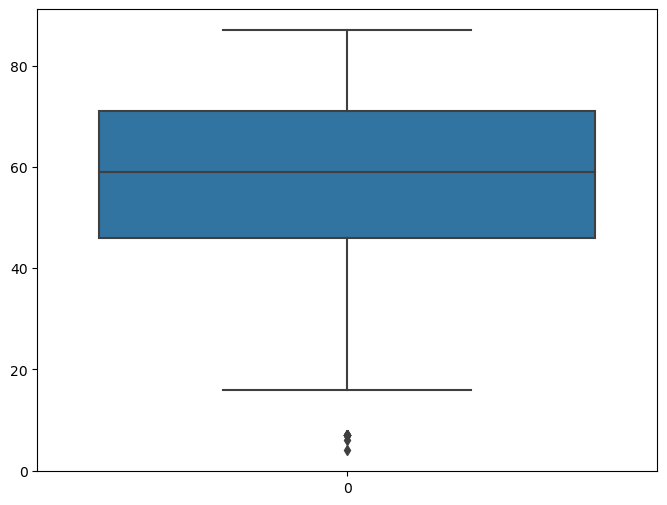

In [76]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(prospective_donor_dataset['DONOR_AGE'])

<Axes: xlabel='DONOR_AGE', ylabel='Density'>

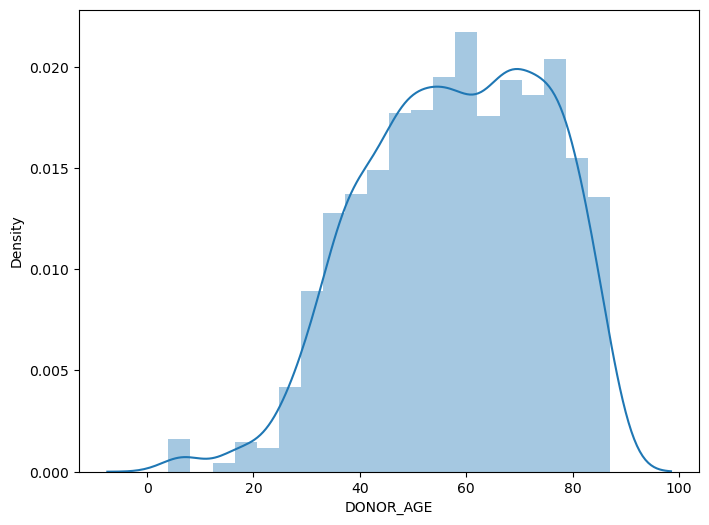

In [77]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(prospective_donor_dataset['DONOR_AGE'])

In [78]:
prosp_donor_age_median = prospective_donor_dataset['DONOR_AGE'].median()
prospective_donor_dataset['DONOR_AGE'].fillna(prosp_donor_age_median, inplace=True)

<Axes: >

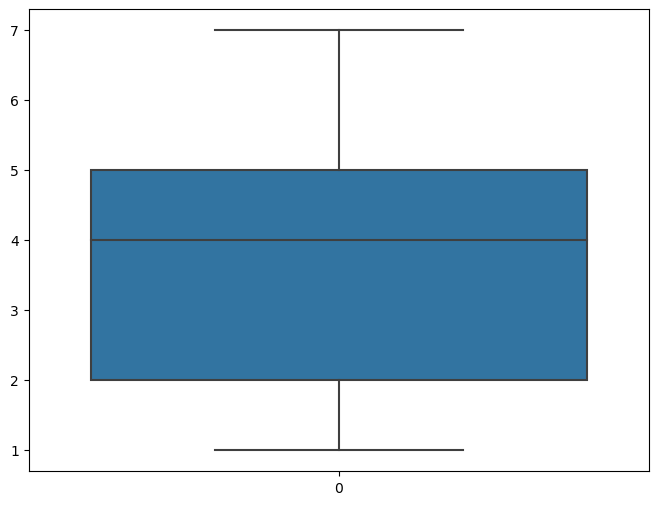

In [79]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(prospective_donor_dataset['INCOME_GROUP'])

<Axes: xlabel='INCOME_GROUP', ylabel='Density'>

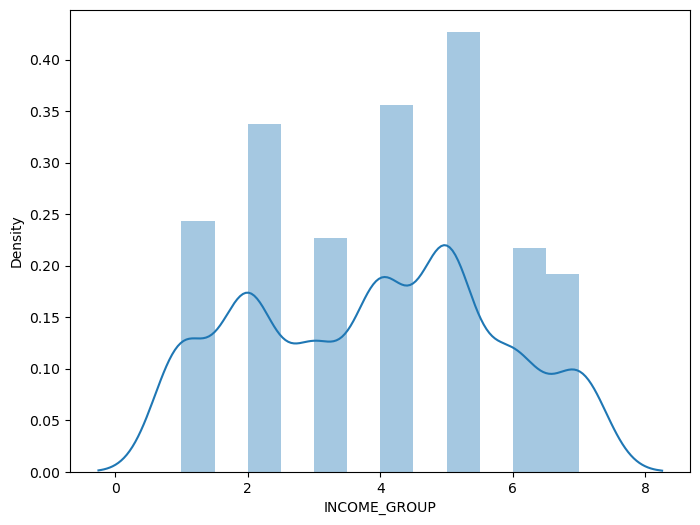

In [80]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(prospective_donor_dataset['INCOME_GROUP'])

In [81]:
prosp_donor_incomegrp_mean = prospective_donor_dataset['INCOME_GROUP'].mean()
prospective_donor_dataset['INCOME_GROUP'].fillna(prosp_donor_incomegrp_mean, inplace=True)

<Axes: >

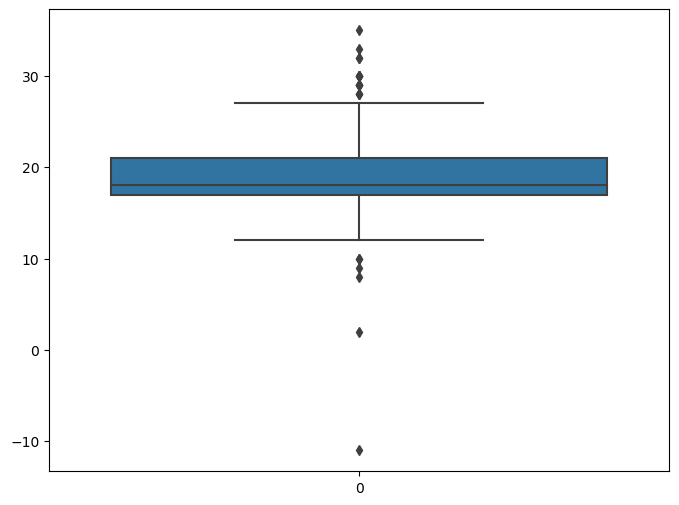

In [82]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Box plot
#
sns.boxplot(prospective_donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'])

<Axes: xlabel='MONTHS_SINCE_LAST_PROM_RESP', ylabel='Density'>

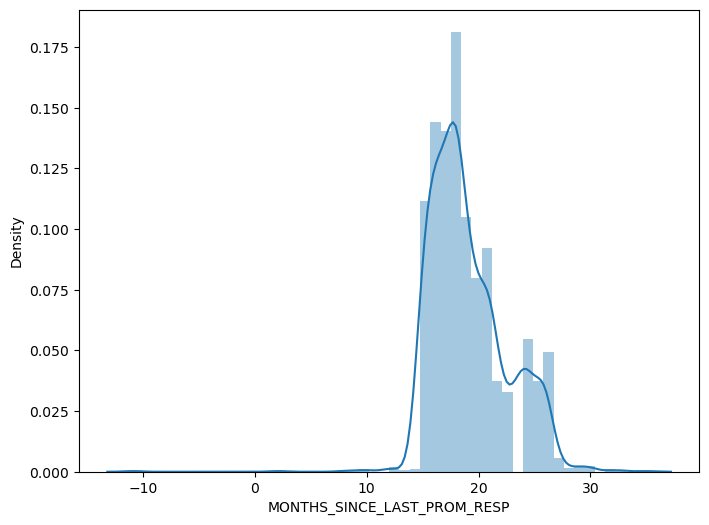

In [83]:
fig , ax = plt.subplots(figsize = (8 ,6))
# Distribution plot
#
sns.distplot(prospective_donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'])

In [84]:
prosp_donor_month_median = prospective_donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].median()
prospective_donor_dataset['MONTHS_SINCE_LAST_PROM_RESP'].fillna(prosp_donor_month_median, inplace=True)

In [85]:
prospective_donor_dataset.isnull().sum()

CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                         0
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                      0
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

In [86]:
prospective_donor_dataset['URBANICITY'] = ord_enc.fit_transform(prospective_donor_dataset[['URBANICITY']])
prospective_donor_dataset['HOME_OWNER'] =ord_enc.fit_transform(prospective_donor_dataset[['HOME_OWNER']])
prospective_donor_dataset['DONOR_GENDER'] =ord_enc.fit_transform(prospective_donor_dataset[['DONOR_GENDER']])

prospective_donor_dataset.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,59.0,0,2.0,2,46,1.0,0.0,3.902819,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,59.0,0,2.0,2,43,1.0,0.0,3.902819,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,4.0,1,35,0.0,1.0,6.000000,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,5.0,1,02,0.0,1.0,6.000000,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,59.0,0,4.0,2,40,1.0,0.0,2.000000,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [87]:
prospective_feature = prospective_donor_dataset[['PEP_STAR',
 'FREQUENCY_STATUS_97NK',
 'RECENT_RESPONSE_PROP',
 'RECENT_AVG_GIFT_AMT',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'LIFETIME_PROM',
 'LIFETIME_GIFT_COUNT',
 'LIFETIME_AVG_GIFT_AMT',
 'LAST_GIFT_AMT',
 'MONTHS_SINCE_LAST_GIFT',
 'MONTHS_SINCE_FIRST_GIFT',
 'FILE_AVG_GIFT',
 'FILE_CARD_GIFT']]
prospective_feature

,PEP_STAR,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,LIFETIME_PROM,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,1,0.071,21.00,0.000,1,0,25,7,14.71,21.0,26,90,14.71,2
1,1,2,0.350,10.00,0.500,7,5,110,31,6.00,10.0,22,129,6.00,14
2,0,1,0.077,20.00,0.200,1,1,39,9,8.44,20.0,20,87,8.44,1
3,1,1,0.333,8.83,0.444,6,4,114,38,6.50,10.0,19,129,6.50,22
4,0,3,0.278,5.40,0.222,5,2,43,12,5.83,5.0,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,1,1,0.100,16.00,0.100,2,1,59,9,11.44,17.0,26,101,11.44,7
2144,0,1,0.045,32.00,0.000,1,0,65,6,28.83,32.0,26,44,28.83,2
2145,1,3,0.263,11.20,0.364,5,4,62,17,8.41,10.0,18,81,8.41,8
2146,0,1,0.071,20.00,0.000,1,0,39,3,18.33,20.0,18,56,18.33,1


In [88]:
# # correlation between target and features
# (df.corr().loc['']
#  .plot(kind='barh', figsize=(4,10)))

In [89]:
prospective_feature.isnull().sum()

PEP_STAR                      0
FREQUENCY_STATUS_97NK         0
RECENT_RESPONSE_PROP          0
RECENT_AVG_GIFT_AMT           0
RECENT_CARD_RESPONSE_PROP     0
RECENT_RESPONSE_COUNT         0
RECENT_CARD_RESPONSE_COUNT    0
LIFETIME_PROM                 0
LIFETIME_GIFT_COUNT           0
LIFETIME_AVG_GIFT_AMT         0
LAST_GIFT_AMT                 0
MONTHS_SINCE_LAST_GIFT        0
MONTHS_SINCE_FIRST_GIFT       0
FILE_AVG_GIFT                 0
FILE_CARD_GIFT                0
dtype: int64

## 
## Split and Training The Dataset For Donor Prediction

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42 )

In [91]:
X_train.shape

(15497, 15)

In [92]:
X_test.shape

(3875, 15)

In [93]:
y_train.shape

(15497,)

In [94]:
y_test.shape

(3875,)

In [95]:
###################################
# Import libaries and create model function
##################################
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def Model(model):
    model.fit(X_train,y_train)
#     score = model.score(X_test, y_test)
    regr_predicted = model.predict(X_test)
    MSE=mean_squared_error(y_test, regr_predicted)
    MAE=mean_absolute_error(y_test, regr_predicted)
    r2=r2_score(y_test, regr_predicted)
    RMSE = np.sqrt(MSE)
    print("R squared value:           ", r2)
    print("Root Mean Squared Error :  ", RMSE)
    print("Mean Absolute Error :      ", MAE)
    print("score on train: "+ str(model.score(X_train, y_train)))
    print("score on test: " + str(model.score(X_test, y_test)))
   

## Logistics model

In [96]:
l_regr = LogisticRegression()
l_regr.fit(X_train, y_train)

LogisticRegression()

In [97]:
l_regr_predicted = l_regr.predict(X_test)
l_regr_predicted

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
l_regr_predicted_df = pd.DataFrame(data = l_regr_predicted)

l_regr_predicted_df

,0
0,1
1,0
2,0
3,0
4,0
...,...
3870,0
3871,0
3872,0
3873,0


## Decision Tree Model

In [99]:
d_clas = DecisionTreeClassifier()
d_clas.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
d_clas_predicted = d_clas.predict(X_test)
d_clas_predicted

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [101]:
d_clas_predicted_df = pd.DataFrame(data = d_clas_predicted)

d_clas_predicted_df.head()

,0
0,0
1,0
2,1
3,0
4,1


## KNeighbors Classifier Model

In [102]:
k_near = KNeighborsClassifier()
k_near.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
k_near_predicted = k_near.predict(X_test)
k_near_predicted 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
k_near_predicted_df = pd.DataFrame(data =k_near_predicted)

k_near_predicted_df.head()

,0
0,0
1,0
2,0
3,0
4,0


## SVC Model

In [105]:
svc = LinearSVC(C = 0.0001)
svc.fit(X_train, y_train)

LinearSVC(C=0.0001)

In [106]:
svc_predicted = svc.predict(X_test)
svc_predicted 

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
svc_predicted_df = pd.DataFrame(data = svc_predicted)

svc_predicted_df

,0
0,1
1,0
2,0
3,0
4,0
...,...
3870,0
3871,0
3872,0
3873,0


## m naive Model

In [108]:
m_naive = MultinomialNB()
m_naive.fit(X_train, y_train)

MultinomialNB()

In [109]:
m_naive_predicted = m_naive.predict(X_test)
m_naive_predicted 

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [110]:
m_naive_predicted_df = pd.DataFrame(data = m_naive_predicted)

m_naive_predicted_df

,0
0,1
1,1
2,1
3,0
4,0
...,...
3870,0
3871,0
3872,1
3873,1


## Model Evaluation Using Function Created Ealier

In [111]:
Model(l_regr)

R squared value:            -0.31732769131463834
Root Mean Squared Error :   0.4946161757265148
Mean Absolute Error :       0.24464516129032257
score on train: 0.7493708459701878
score on test: 0.7553548387096775


In [112]:
Model(d_clas)

R squared value:            -0.9468102273542283
Root Mean Squared Error :   0.6012889381127631
Mean Absolute Error :       0.36154838709677417
score on train: 0.9862554042717946
score on test: 0.6384516129032258


In [113]:
Model(k_near)

R squared value:            -0.6146991321810231
Root Mean Squared Error :   0.5476047550395591
Mean Absolute Error :       0.2998709677419355
score on train: 0.7811834548622314
score on test: 0.7001290322580646


In [114]:
Model(svc)

R squared value:            -0.31593810514236553
Root Mean Squared Error :   0.49435523338404497
Mean Absolute Error :       0.24438709677419354
score on train: 0.7498225462992837
score on test: 0.7556129032258064


In [115]:
Model(m_naive)

R squared value:            -1.1872086351574271
Root Mean Squared Error :   0.6373331533719996
Mean Absolute Error :       0.40619354838709676
score on train: 0.588759114667355
score on test: 0.5938064516129032


## Testing of Selected Model on Prospective Feature 

In [116]:
svc_predicted_pros = svc.predict(prospective_feature)
svc_predicted_pros

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
svc_predicted_prospective_feature = pd.DataFrame(data = svc_predicted_pros)
svc_predicted_prospective_feature[0].value_counts()

0    2144
1       4
Name: 0, dtype: int64

In [118]:
l_regr_predicted_pros = l_regr.predict(prospective_feature)
l_regr_predicted_pros

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
l_regr_predicted_prospective_feature = pd.DataFrame(data = l_regr_predicted_pros)
l_regr_predicted_prospective_feature[0].value_counts()

0    2140
1       8
Name: 0, dtype: int64

In [120]:
m_naive_predicted_pros = m_naive.predict(prospective_feature)
m_naive_predicted_pros 

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [121]:
m_naive_pros_predicted_prospective_feature = pd.DataFrame(data = m_naive_predicted_pros)
m_naive_pros_predicted_prospective_feature[0].value_counts()

0    1246
1     902
Name: 0, dtype: int64

## Prospective Donnor with Target Colun (Logistics model)

In [125]:
prospective_feature_target = pd.concat((prospective_donor_dataset, l_regr_predicted_prospective_feature), 1)
prospective_feature_target  

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,0
0,139,101,59.0,0,2.0,2,46,1.0,0.0,3.902819,...,21.0,5.0,21.0,4,10,26,90,14.71,2,0
1,142,137,59.0,0,2.0,2,43,1.0,0.0,3.902819,...,11.0,2.0,10.0,9,22,22,129,6.00,14,0
2,282,17,30.0,0,4.0,1,35,0.0,1.0,6.000000,...,20.0,5.0,20.0,5,14,20,87,8.44,1,0
3,368,137,75.0,0,5.0,1,02,0.0,1.0,6.000000,...,10.0,5.0,10.0,10,24,19,129,6.50,22,0
4,387,5,59.0,0,4.0,2,40,1.0,0.0,2.000000,...,10.0,3.0,5.0,5,12,18,85,5.83,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,190842,101,47.0,1,1.0,1,24,1.0,0.0,2.000000,...,17.0,1.0,17.0,5,10,26,101,11.44,7,0
2144,191056,41,17.0,1,5.0,1,01,1.0,1.0,4.000000,...,44.0,20.0,32.0,5,18,26,44,28.83,2,0
2145,191164,89,55.0,0,0.0,?,.,1.0,0.0,6.000000,...,12.0,3.0,10.0,6,13,18,81,8.41,8,0
2146,191484,65,42.0,1,0.0,?,.,1.0,0.0,3.000000,...,20.0,15.0,20.0,6,13,18,56,18.33,1,0


In [126]:
prospective_feature_target[0]

0       0
1       0
2       0
3       0
4       0
       ..
2143    0
2144    0
2145    0
2146    0
2147    0
Name: 0, Length: 2148, dtype: int64

In [127]:
prospective_feature_target.rename(columns = {0:'Predicted Donor'}, inplace = True)

In [128]:
pros_target = prospective_feature_target[prospective_feature_target['Predicted Donor'] == 1]
pros_target

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,Predicted Donor
20,1799,77,59.0,0,1.0,2,27,0.0,1.0,5.000000,...,16.0,3.0,9.0,11,25,4,75,9.24,12,1
27,2678,89,73.0,0,3.0,3,21,1.0,0.0,4.000000,...,6.0,3.0,5.0,10,24,9,78,4.68,19,1
63,5331,113,59.0,1,1.0,1,24,1.0,2.0,7.000000,...,25.0,5.0,15.0,11,30,4,112,11.55,11,1
72,6223,113,71.0,1,1.0,3,31,1.0,1.0,3.902819,...,15.0,5.0,10.0,8,21,5,113,7.63,10,1
153,13969,41,59.0,0,2.0,2,45,1.0,0.0,3.902819,...,15.0,0.0,10.0,6,33,4,35,9.00,5,1
1694,150218,41,21.0,0,3.0,2,20,1.0,1.0,1.000000,...,9.0,3.0,3.0,6,13,15,45,5.13,11,1
2089,186272,101,63.0,1,5.0,1,02,0.0,0.0,4.000000,...,12.0,5.0,10.0,8,22,4,104,8.64,12,1
2121,188999,137,59.0,1,1.0,1,24,1.0,1.0,4.000000,...,11.0,1.5,5.0,6,16,4,126,5.46,14,1


In [129]:
pros_target.URBANICITY.value_counts()

1.0    4
3.0    2
2.0    1
5.0    1
Name: URBANICITY, dtype: int64

Based on the characteristics of individuals that respond to the donation campaign following the prediction analysis. We determine the frequency of these characters.<br>

For NOT NUMERIC INDEPENDENT VARIABLES. We strongly recommend that the campaign manager focuses on individual characteristics in order of their occurrence, for example. URBANITY: Focus more on the city.

For NUMERIC INDEPENDENT VARIABLES, let the value range of an individual character determine the campaign outreach. For example, LAST_GIFT_AMT: Range (5 to 12)

    